In [41]:
####################################################################
###    This is the PYTHON version of program 5.2 from page 171 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the simple SIR epidemic with corrected term-time         #
### forcing of the transmission rate.							   #
### Note: setting beta1 too high can cause numerical difficulties. #
####################################################################

In [42]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*Beta0 is the mean transmission rate.

*Beta1 is the amplitude of term-time forcing.

*mu is the per capita death rate, and the population level birth rate.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*S0 is the initial proportion of the population that are susceptible.

*I0 is the initial proportion of the population that are infectious.

In [43]:
Beta0=17/13.;
Beta1=([0.25]);
gamma=1/13.0;
mu=1/(50*365.0);
S0=1/17.;
I0=1e-4;
Years=10;
MaxTime=365.;
TS=1.0

In [44]:
def term(t):
	t=np.mod(t,365)
	if t < 6 or t > 100 and t < 115 or t > 200 and t < 251 or t > 300 and t < 307 or t > 356 and t <= 365:
		Term = -1
	else:
		Term = 1
	return Term

In [45]:
### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
#(Beta0,Beta1,gamma,mu,S0,I0,Years, MaxTime)=(17/13.,np.arange(0.00,0.301,0.001),1/13.,1./(50*365),1/17.,1e-4,20,365.)

In [46]:
ND=Years*MaxTime
INPUT=np.array((S0,I0, 1-S0-I0))

In [47]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	beta=beta0-beta1
	Y[0] = mu - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

In [48]:
def diff_eqs2(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	beta=beta0+beta1
	Y[0] = mu - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

In [49]:
def FORCED_ODE(diff_eqs,INPUT, beta0, beta1):
	'''Calculates the differential rates used in the integration.'''
	RES=np.zeros((3))
	for Year in range(Years):
        
		t_start =  Year*365.+1; t_end = Year*365.+6.; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
        
		t_start =  Year*365.+7; t_end = Year*365.+100; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
        
		t_start = Year*365.+101; t_end = Year*365.+115; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
        
		INPUT=RES2[-1]
		t_start = Year*365.+116; t_end = Year*365.+200; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
        
		INPUT=RES2[-1]
		t_start = Year*365.+201; t_end = Year*365.+251; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
        
		INPUT=RES2[-1]
		t_start = Year*365.+252; t_end = Year*365.+300; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
        
		INPUT=RES2[-1]
		t_start = Year*365.+301; t_end = Year*365.+307; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
        
		INPUT=RES2[-1]
		t_start = Year*365.+308; t_end = Year*365.+356; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
        
		INPUT=RES2[-1]
		t_start = Year*365.+357; t_end = Year*365.+365; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
        
		INPUT=RES2[-1]
	INPUT = RES[-1]	
	return RES

1.1578112609040443 0.25
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.88235294e-02 1.00000000e-04 9.41076471e-01]
 [5.88698186e-02 9.76713186e-05 9.41032510e-01]
 ...
 [6.03392014e-02 5.87773487e-04 9.39073025e-01]
 [6.03588433e-02 5.74873348e-04 9.39066283e-01]
 [6.03791721e-02 5.62266403e-04 9.39058562e-01]]


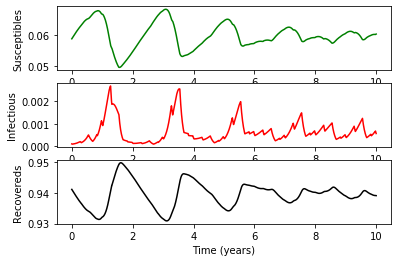

In [50]:
if len(Beta1)==1:
	beta1=Beta1[0]

	### Calculate Average Effect of Forcing and Correct for it.
	Ave=0;
	for t in np.arange(1,366):
		Ave+=(1+beta1*term(t+0.5))
	beta0=Beta0/(Ave/365)
	print(beta0, beta1)
	t_start = 0.0; t_end = ND; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = FORCED_ODE(diff_eqs,INPUT, beta0, beta1)

	print(RES)

	t=(np.arange(ND)/365.)
	#Ploting
	pl.subplot(311)
	pl.plot(t,RES[1:,0], 'g', label='S')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Susceptibles')
	pl.subplot(312)
	pl.plot(t,RES[1:,1], 'r', label='I')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Infectious')
	pl.subplot(313)
	pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Recovereds')

else:
	if ND < 3650:
		ND = 3650
		
	Bifur_I=np.zeros((len(Beta1),10))
	
	for i in range(len(Beta1)):
		beta1 = Beta1[i]
		### Calculate Average Effect of Forcing and Correct for it.
		Ave=0;
		for t in np.arange(1,366):
			Ave+=(1+beta1*term(t+0.5))
		beta0=Beta0/(Ave/365)

		t_start = 0.0; t_end = ND; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES = FORCED_ODE(diff_eqs,INPUT,beta0, beta1)
		INPUT=RES[-1]
		

		for j in range(10):
			Bifur_I[i,j]=RES[np.arange(ND)[((ND-j*365.)-1)],1]
			
	pl.plot (Beta1, np.log10(Bifur_I), '.k')
	### if TeX commands do not work comment the next line
	pl.xlabel (r'Seasonality, $\beta_1$')
	pl.ylabel (r'Level of Infection $(log_{10})$')
	### if TeX commands do not work uncomment the next line
#	pl.xlabel ('Seasonality, beta1')
#	pl.ylabel ('Level of Infection (log_10)')
pl.show()